In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df = pd.read_excel (r'content\Train.xlsx', index_col= 0)

In [160]:
tests_excel = ['Test_example1.xlsx', 'Test_example2.xlsx']
df_test = pd.DataFrame()
for test in tests_excel:
    temp = pd.read_excel (f'content\\{test}', index_col= 0)
    df_test = pd.concat([df_test, temp], axis=1)
df_test

,Var1,Var2,Var3,Var4,Var1,Var2,Var3,Var4
01m01,0,6.331,3.383413,0,0,6.331,3.383413,0
01m02,0.015873,2.514,3.420624,-0.017146,0.015873,2.514,3.420624,-0.017146
01m03,0.026813,2.625,3.363693,0.061665,0.026813,2.625,3.363693,0.061665
01m04,0.036764,1.888,3.130242,0.052624,0.036764,1.888,3.130242,0.052624
01m05,0.044732,1.308,3.210488,0.042574,0.044732,1.308,3.210488,0.042574
...,...,...,...,...,...,...,...,...
10m08,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,4.728274,Forecast
10m09,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,4.714565,Forecast
10m10,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,4.703895,Forecast
10m11,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,4.684857,Forecast


In [147]:
df = df.drop('Преобразование')
df = df.apply(pd.to_numeric)
df = df.reset_index()

In [148]:
df['index'] =pd.to_datetime(df['index'], format="%YM%m").dt.strftime('%Y-%m-%d')
df = df.rename({'index': 'date'}, axis='columns')

In [149]:
first_null = ["Обеспеченность оборота розничной торговли запасами, дней", "Товарные запасы в организациях розничной торговли, млрд.руб.", "Ввод в действие жилых домов, млн кв.м", "Реальные товарные запасы в организациях розничной торговли"]
first_null_date = first_null + ['date']
df.isnull().sum().sort_values(ascending=False)

Обеспеченность оборота розничной торговли запасами, дней        24
Товарные запасы в организациях розничной торговли, млрд.руб.    24
Ввод в действие жилых домов, млн кв.м                           24
Реальные товарные запасы в организациях розничной торговли      24
Индекс потребительских цен, непродовольственные                  0
                                                                ..
Оборот розничной торговли, продукты, млрд.руб.                   0
Реальный оборот розничной торговли, продукты                     0
Оборот розничной торговли, непродовольственные, млрд.руб.        0
Реальный оборот розничной торговли, непродовольственные          0
Цена Urals, долл/бар                                             0
Length: 70, dtype: int64

In [150]:
# df['month'] = df['date'].Month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 70 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   date                                                                         156 non-null    object 
 1   Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения           156 non-null    float64
 2   Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения            156 non-null    float64
 3   Диффузный индекс заработной платы, ожидаемые изменения                       156 non-null    float64
 4   Диффузный индекс занятости, ожидаемые изменения                              156 non-null    float64
 5   Диффузный индекс выпуска, ожидаемые изменения                                156 non-null    float64
 6   Диффузный индекс закупок оборудования, ожи

In [125]:
df.describe()

,"Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения","Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения","Диффузный индекс заработной платы, ожидаемые изменения","Диффузный индекс занятости, ожидаемые изменения","Диффузный индекс выпуска, ожидаемые изменения","Диффузный индекс закупок оборудования, ожидаемые изменения","Диффузный индекс финансового состояния, ожидаемые изменения","Диффузный индекс портфеля заказов, ожидаемые изменения","Диффузный индекс задолженности банкам, ожидаемые изменения","Производство скота и птицы, тыс.тонн",...,"Среднемесячная пенсия, руб.",Реальная пенсия,MIACR,"Ставка по краткосрочным кредитам, население","Ставка по долгосрочным кредитам, население","Ставка по краткосрочным кредитам, фирмы","Ставка по долгосрочным кредитам, фирмы","Краткосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Долгосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Цена Urals, долл/бар"
count,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,70.275641,85.628205,63.50000,43.179487,52.852564,34.333333,54.596154,57.108974,24.711538,6.680447,...,8.498510,0.578796,5.420250,23.210590,18.344045,11.348660,12.639179,8.229336,8.597713,4.199111
std,8.230215,6.009904,9.46675,6.015557,10.934883,6.230345,8.277275,9.834484,3.526873,0.319674,...,0.680459,0.347712,3.310019,3.546629,1.854030,2.412382,1.805275,0.548556,1.123447,0.458252
min,52.000000,69.000000,38.00000,24.000000,21.000000,18.000000,29.000000,32.000000,15.000000,6.173786,...,7.288791,-0.001091,0.921000,17.145000,14.615000,7.939000,9.711000,6.993658,6.290272,3.130242
25%,64.750000,81.750000,57.00000,40.000000,45.000000,30.000000,50.000000,49.750000,23.000000,6.404401,...,7.892685,0.256532,3.069500,20.370750,17.230000,9.520750,11.215750,7.785511,7.598119,3.882233
50%,70.000000,85.500000,64.00000,43.000000,54.000000,35.000000,56.000000,58.000000,25.000000,6.682725,...,8.549495,0.567462,4.867000,23.240000,18.448000,10.686000,12.269500,8.365871,9.018580,4.245569
75%,76.000000,90.250000,71.00000,47.250000,61.000000,38.000000,61.000000,65.000000,27.000000,6.898951,...,9.122257,0.924559,6.394000,25.112000,19.657000,12.425000,13.644250,8.642305,9.533104,4.660194
max,89.000000,98.000000,80.00000,56.000000,73.000000,48.000000,70.000000,76.000000,35.000000,7.414573,...,9.401118,0.997020,16.965000,33.577000,23.300000,19.864000,19.600000,8.983678,10.131233,4.865307


# Матрица корреляции

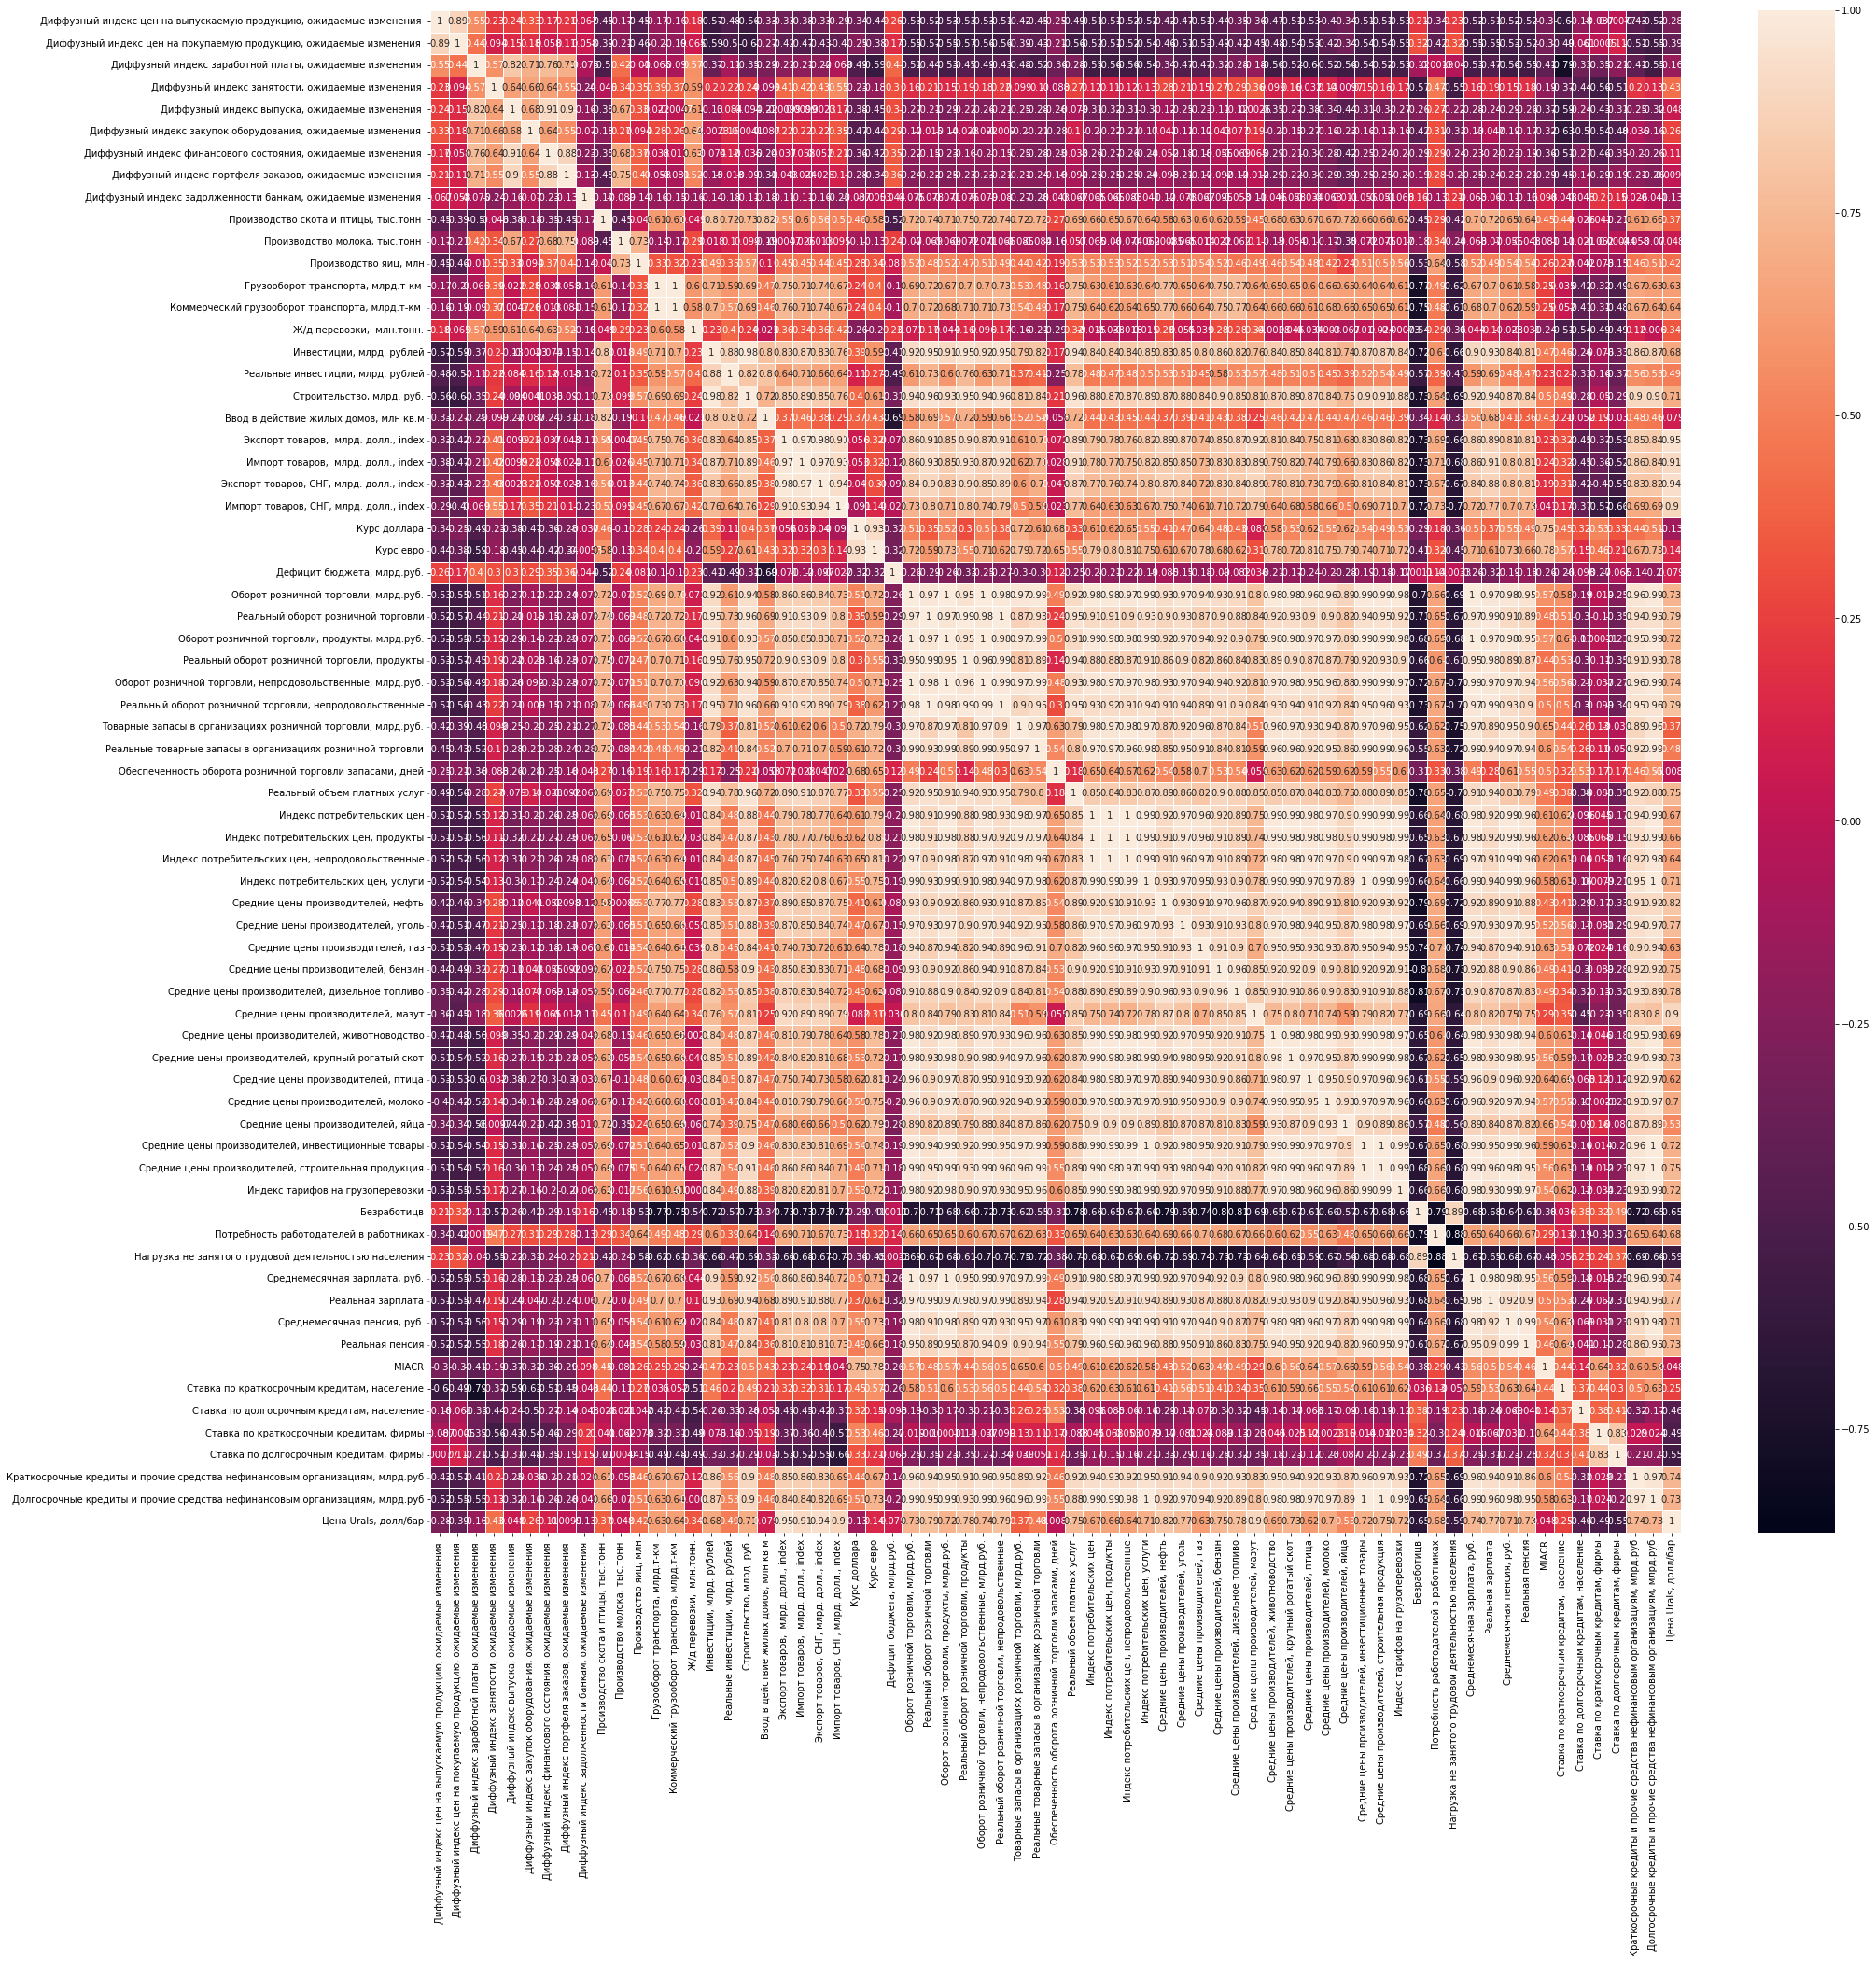

In [126]:
import seaborn as sns

plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths = 1)
plt.show()

# KNN

In [151]:
# Первые 24 значения из df[first_null] не даны, поэтому будем их предсказывать

# Для этого будем использовать те данные, которые были даны на соответствующие даты
not_null_df = df[[item for item in df.columns if item not in first_null_date]]
not_null_df

,"Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения","Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения","Диффузный индекс заработной платы, ожидаемые изменения","Диффузный индекс занятости, ожидаемые изменения","Диффузный индекс выпуска, ожидаемые изменения","Диффузный индекс закупок оборудования, ожидаемые изменения","Диффузный индекс финансового состояния, ожидаемые изменения","Диффузный индекс портфеля заказов, ожидаемые изменения","Диффузный индекс задолженности банкам, ожидаемые изменения","Производство скота и птицы, тыс.тонн",...,"Среднемесячная пенсия, руб.",Реальная пенсия,MIACR,"Ставка по краткосрочным кредитам, население","Ставка по долгосрочным кредитам, население","Ставка по краткосрочным кредитам, фирмы","Ставка по долгосрочным кредитам, фирмы","Краткосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Долгосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Цена Urals, долл/бар"
0,74.0,93.0,61.0,40.0,44.0,28.0,47.0,44.0,22.0,6.269096,...,7.288791,0.000000,6.331,21.500,18.900,14.500,17.300,6.993658,6.290272,3.383413
1,78.0,95.0,66.0,37.0,49.0,30.0,53.0,56.0,18.0,6.320768,...,7.313953,0.008960,2.514,22.200,17.800,14.100,19.600,7.019476,6.298398,3.420624
2,84.0,98.0,72.0,45.0,56.0,29.0,51.0,61.0,25.0,6.361302,...,7.314153,-0.001091,2.625,18.300,19.900,13.300,16.400,7.031299,6.325613,3.363693
3,83.0,95.0,70.0,40.0,66.0,38.0,59.0,69.0,23.0,6.269096,...,7.382809,0.057178,1.888,20.000,21.300,13.400,14.900,7.048821,6.343001,3.130242
4,79.0,94.0,76.0,43.0,66.0,33.0,63.0,68.0,23.0,6.177944,...,7.382809,0.049146,1.308,23.100,21.500,12.500,15.000,7.076400,6.371099,3.210488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,53.0,77.0,61.0,47.0,52.0,26.0,54.0,55.0,28.0,6.908755,...,9.399356,0.930757,10.859,25.706,18.898,14.236,14.576,8.971271,10.073564,3.820565
152,60.0,81.0,55.0,48.0,46.0,27.0,51.0,56.0,30.0,7.050989,...,9.400084,0.925745,11.147,24.941,18.446,13.971,14.192,8.928919,10.079342,3.842887
153,57.0,80.0,56.0,39.0,47.0,26.0,50.0,52.0,15.0,7.155396,...,9.400804,0.918720,11.140,25.339,18.272,13.583,14.394,8.937179,10.069697,3.845242
154,65.0,89.0,55.0,40.0,40.0,29.0,45.0,52.0,24.0,7.284821,...,9.400332,0.910688,11.425,25.110,18.024,13.746,14.174,8.983678,10.078512,3.740285


In [153]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
predicted_values = pd.DataFrame(knn.fit(not_null_df[24:], df[first_null][24:]).predict(not_null_df[:24]), columns = first_null)
predicted_values

,"Обеспеченность оборота розничной торговли запасами, дней","Товарные запасы в организациях розничной торговли, млрд.руб.","Ввод в действие жилых домов, млн кв.м",Реальные товарные запасы в организациях розничной торговли
0,31.4,5.694342,0.864691,0.357112
1,30.8,5.957804,1.415842,0.652557
2,31.0,6.092268,1.386522,0.782636
3,31.4,5.895948,1.088855,0.573254
4,31.2,6.117042,1.486993,0.765792
5,30.6,6.031911,1.341730,0.699149
6,31.0,6.132258,1.403761,0.773513
7,31.0,6.051560,1.273380,0.705737
8,30.6,6.031911,1.341730,0.699149
9,31.2,5.970139,1.289516,0.626294


In [156]:
df.loc[:23, first_null] = predicted_values

In [157]:
df[first_null_date][20:28]

,"Обеспеченность оборота розничной торговли запасами, дней","Товарные запасы в организациях розничной торговли, млрд.руб.","Ввод в действие жилых домов, млн кв.м",Реальные товарные запасы в организациях розничной торговли,date
20,31.4,5.619789,0.872536,0.304314,2004-09-01
21,31.4,5.548339,0.869886,0.218024,2004-10-01
22,31.6,5.575408,0.678784,0.238428,2004-11-01
23,31.4,5.993876,1.550832,0.691484,2004-12-01
24,33.0,5.247024,0.741937,0.000000,2005-01-01
25,32.0,5.297817,0.587787,0.044017,2005-02-01
26,32.0,5.407620,0.993252,0.143862,2005-03-01
27,32.0,5.423186,0.641854,0.148850,2005-04-01


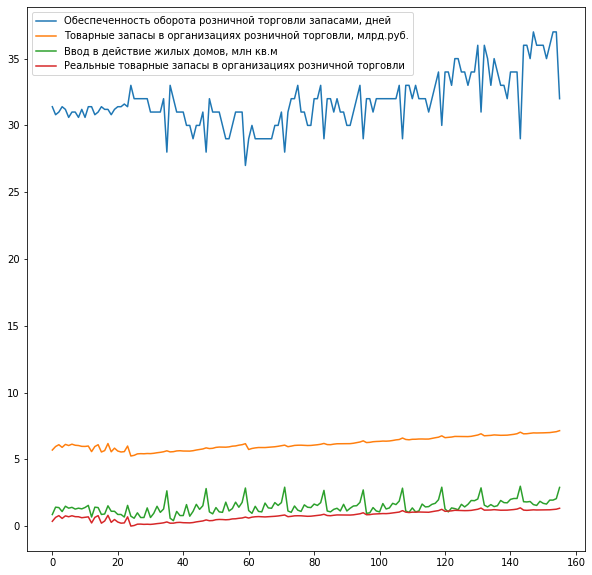

In [158]:
plt.subplots(figsize=(10,10))
for column in first_null:
    plt.plot(df[column], label=column)
plt.legend()